In [1]:
import quaternion
import numpy as np
import shapely
from shapely.geometry import Polygon

/home/tagokeniot/hypo_workspace/hypo/.venv/lib/python3.8/site-packages/quaternion/numba_wrapper.py:23: UserWarning: 

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Could not import from numba, which means that some
parts of this code may run MUCH more slowly.  You
may wish to install numba.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

  warnings.warn(warning_text)


In [2]:
from randoor import utils

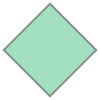

In [3]:
points = utils.get_square_horizon((0,0), 1, np.pi/4)
Polygon(points)

In [4]:
utils.add_dimension(np.arange(9).reshape((3,3)), 0)

array([[0, 1, 2, 0],
       [3, 4, 5, 0],
       [6, 7, 8, 0]])

In [5]:
from randoor.spawner import poly

[[  3.66025404  13.66025404]
 [ 13.66025404  -3.66025404]
 [ -3.66025404 -13.66025404]
 [-13.66025404   3.66025404]]


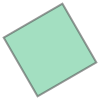

In [6]:
area_points = utils.get_square_horizon((0,0), 10, np.pi/6)
print(area_points)
area_poly = Polygon(area_points)
area_poly

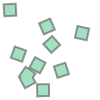

In [7]:
from shapely.ops import unary_union
xy, yaw, polys = poly.sprinkle_cube(area_poly, 10, 2)
mulp = unary_union(polys)
mulp

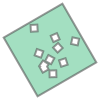

In [8]:
Polygon(area_points, [p.exterior.coords for p in mulp.geoms])

In [9]:
from sklearn.cluster import DBSCAN
eps = 3
points = np.array([p.centroid.coords[0] for p in polys])
db = DBSCAN(eps=eps, min_samples=1).fit(points)
db.labels_

array([0, 1, 0, 2, 3, 0, 4, 5, 6, 7])

In [10]:
from trimesh.convex import hull_points
hull_points(polys[0].exterior.coords)

array([[-1.42805581, -3.23521019],
       [ 0.33243486, -4.18424791],
       [ 1.28147259, -2.42375725],
       [-0.47901808, -1.47471952]])

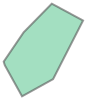

In [11]:
pp = np.array(polys)
hpoints = np.concatenate([p.exterior.coords for p in pp[db.labels_==0]])
hull = hull_points(hpoints)
Polygon(hull)

In [12]:
from trimesh.path.polygons import sample
face_size = 0.001
factor = 1 / face_size
face = Polygon(area_poly.buffer(face_size).exterior.coords, [area_poly.exterior.coords])
sample(face, 2, factor=factor)

array([[ 2.71841706, -9.9776927 ],
       [-8.86900227, -4.63945551]])

In [13]:
from randoor.spawner import geom
geom.sample_from_faces([area_poly], 5, face_size)

array([[[ -1.9994958 ,  10.39303747],
        [  1.01742898, -10.95977619],
        [  9.13586057,  -6.27302231],
        [ -8.14269858,   6.84665842],
        [-12.29075907,   1.28709114]]])

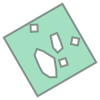

In [14]:
zone_polys, zone_hull = poly.get_clustered_zones(polys, 4)
free_zone = Polygon(area_poly.exterior.coords, [p.exterior.coords for p in zone_hull])
free_zone

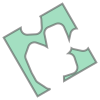

In [15]:
pat = 1.6
keyarea_range = 0.3

path_area = free_zone.buffer(-pat)
path_area

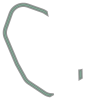

In [16]:
key_area = path_area.intersection(zone_hull[0].buffer(pat+keyarea_range))
key_area

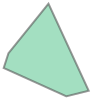

In [17]:
wall = poly.random_triangulation()
wall

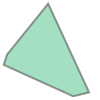

In [18]:
Polygon(wall.exterior.buffer(1).interiors[0])

In [19]:
from randoor.generator import empty_room
generator = empty_room.EmptyRoomGenerator(9, 0.05)
config = generator.generate_new()

/home/tagokeniot/hypo_workspace/randoor/randoor/generator_factory.py:111: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  h = [p.exterior.coords for p in holes]


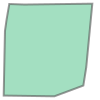

In [20]:
config.get_freespace_poly()

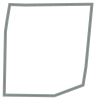

In [21]:
config.get_collision_poly()

[-0.30114034  0.50850006]


/home/tagokeniot/hypo_workspace/hypo/.venv/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


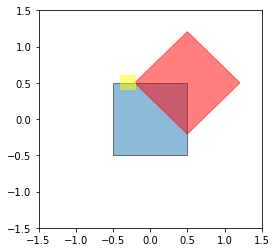

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon
from shapely.affinity import affine_transform
from descartes import PolygonPatch
from randoor import utils

fig = plt.figure(0, figsize=(4,4))

ax = fig.add_subplot(111)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

x = 0.5
y = 0.5
yaw = np.pi / 4

affine = utils.get_affine_tf_rt(x,y,yaw)

p = Polygon(utils.get_square_horizon((0,0), 0.5))
ax.add_patch(PolygonPatch(p, alpha=0.5, zorder=1))

abcdeoo = [affine[0,0], affine[0,1], affine[1,0], affine[1,1], affine[0,2], affine[1,2]]
pp = affine_transform(p, abcdeoo)
ax.add_patch(PolygonPatch(pp, color='red', alpha=0.5, zorder=2))

sample_xy = geom.sample_from_faces([p], face_size=0.01)
print(sample_xy[0][0])
# ss = Polygon(utils.get_square_horizon(sample_xy[0][0], 0.2))
ss = poly.simple_cube(0.2, sample_xy[0][0])
ax.add_patch(PolygonPatch(ss, color='yellow', alpha=0.5, zorder=3))

plt.show()

In [23]:
sum([len(geom.sample_sure(key_area, 2, keyarea_range)) for _ in range(100)])

200